<h1>Credit Card Fraud Unsupervised Approach</h1>

<h3>Dependencies</h3>

In [1]:
import os
import random as rn
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [2]:
os.environ['PYTHONHASHSEED']= '0'
np.random.seed(1)
rn.seed(1)

<h3>Dataset Load and Head Print</h3>

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<h3>Check the Classes and the items per Class</h3>

In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<h2>TSNE Example with Imbalanced Dataset on the first 10.000 results</h2>

<h3>Min Max Scaler</h3>

In [5]:
scaler = MinMaxScaler()

<h3>Evaluator and Train Data</h3>

In [6]:
evaluator = df['Class']
evaluator = evaluator[:3000]

In [7]:
dataset = df.drop(columns=['Class'])
dataset = dataset[:3000]
dataset = scaler.fit_transform(dataset)

<h3>TSNE</h3>

In [8]:
start_train = datetime.datetime.now().replace(microsecond=0)
X_embedded = TSNE(n_components=2,verbose=1,perplexity=80).fit_transform(dataset)
end_train = datetime.datetime.now().replace(microsecond=0)
print('\n\nTSNE Imbalanced Train Time: ',end_train-start_train)

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.003s...
[t-SNE] Computed neighbors for 3000 samples in 0.665s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 0.199154
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.808578
[t-SNE] KL divergence after 1000 iterations: 1.374452


TSNE Imbalanced Train Time:  0:00:27


<h3>X Y axis</h3>

In [9]:
vis_x = X_embedded[:,0]
vis_y = X_embedded[:,1]

<h3>2d Scatter Plot</h3>

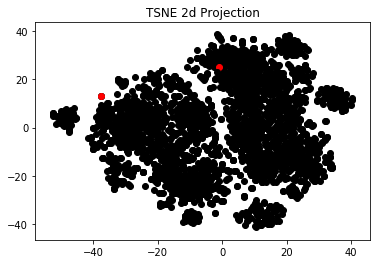

In [10]:
for index in range(len(vis_x)):
    
    if evaluator[index] == 0:
        
        plt.scatter(vis_x[index], vis_y[index], color = 'black')
    
    else:
        
        plt.scatter(vis_x[index], vis_y[index], color = 'red')

plt.title('TSNE 2d Projection')
plt.show()

<h2>PCA & TSNE Comparison</h2>

In [11]:
pca = PCA(n_components=2)

<h3>2d PCA</h2>

In [12]:
dataset = pca.fit_transform(dataset)

<h3>2d TSNE</h3>

In [13]:
start_train = datetime.datetime.now().replace(microsecond=0)
X_embedded = TSNE(n_components=2,verbose=1,perplexity=80).fit_transform(dataset)
end_train = datetime.datetime.now().replace(microsecond=0)
print('\n\nPCA & TSNE Imbalanced Train Time: ',end_train-start_train)

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.002s...
[t-SNE] Computed neighbors for 3000 samples in 0.135s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 0.042225
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.252953
[t-SNE] KL divergence after 1000 iterations: 0.472560


PCA & TSNE Imbalanced Train Time:  0:00:25


<h3>X Y axis</h3>

In [14]:
vis_x = X_embedded[:,0]
vis_y = X_embedded[:,1]

<h3>2d Scatter Plot</h3>

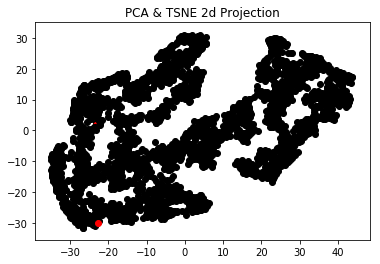

In [15]:
for index in range(len(vis_x)):
    
    if evaluator[index] == 0:
        
        plt.scatter(vis_x[index], vis_y[index], color = 'black')
    
    else:
        
        plt.scatter(vis_x[index], vis_y[index], color = 'red')

plt.title('PCA & TSNE 2d Projection')
plt.show()

<h2>A Balanced Dataset Approach</h2>

<h3>Fraud Transactions</h3>

In [16]:
ones = df[df.Class == 1]

In [17]:
len(ones)

492

<h3>Regular Transactions</h3>

In [18]:
zeroes = df[df.Class == 0]

In [19]:
len(zeroes)

284315

<h3>Random Sampling from the Regular Transactions to balance the dataset</h3>

In [20]:
balanced_dataset = pd.concat([ones,zeroes.sample(n=len(ones))],axis=0)
balanced_dataset = shuffle(balanced_dataset)
balanced_dataset = balanced_dataset.reset_index()

<h3>Evaluation Dataset</h3>

In [21]:
balanced_evaluator = balanced_dataset['Class']

<h3>Train Dataset</h3>

In [22]:
balanced_dataset = balanced_dataset.drop(columns=['Class'])

<h3>Min Max Scaler for the Balanced Dataset</h3>

In [23]:
balanced_scaler = MinMaxScaler()

In [24]:
balanced_dataset = balanced_scaler.fit_transform(balanced_dataset)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


<h3>2d TSNE</h3>

In [25]:
start_train = datetime.datetime.now().replace(microsecond=0)
X_embedded_2d = TSNE(n_components=2,verbose=1,perplexity=80).fit_transform(balanced_dataset)
end_train = datetime.datetime.now().replace(microsecond=0)
print('\n\n2d TSNE Balanced Train Time: ',end_train-start_train)

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 984 samples in 0.001s...
[t-SNE] Computed neighbors for 984 samples in 0.107s...
[t-SNE] Computed conditional probabilities for sample 984 / 984
[t-SNE] Mean sigma: 0.253293
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.353024
[t-SNE] KL divergence after 1000 iterations: 0.573837


2d TSNE Balanced Train Time:  0:00:10


<h3>X Y axis</h3>

In [26]:
vis_balanced_x_2d = X_embedded_2d[:,0]
vis_balanced_y_2d = X_embedded_2d[:,1]

<h3>2d Scatter Plot</h3>

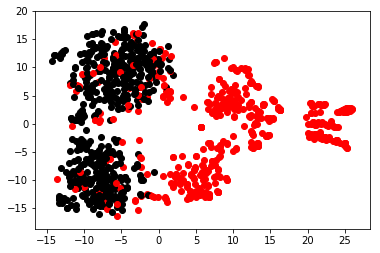

In [27]:
for index in range(len(vis_balanced_x_2d)):
    
    if balanced_evaluator[index] == 0:
        
        plt.scatter(vis_balanced_x_2d[index], vis_balanced_y_2d[index], color = 'black')
    
    else:
        
        plt.scatter(vis_balanced_x_2d[index], vis_balanced_y_2d[index], color = 'red')

plt.show()

<h3>3d TSNE</h3>

In [28]:
start_train = datetime.datetime.now().replace(microsecond=0)
X_embedded_3d = TSNE(n_components=3,verbose=1,perplexity=80).fit_transform(balanced_dataset)
end_train = datetime.datetime.now().replace(microsecond=0)
print('\n\n3d TSNE Balanced Train Time: ',end_train-start_train)

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 984 samples in 0.002s...
[t-SNE] Computed neighbors for 984 samples in 0.171s...
[t-SNE] Computed conditional probabilities for sample 984 / 984
[t-SNE] Mean sigma: 0.253293
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.874111
[t-SNE] KL divergence after 1000 iterations: 0.424858


3d TSNE Balanced Train Time:  0:00:50


<h3>X Y Z axis</h3>

In [29]:
vis_balanced_x_3d = X_embedded_3d[:,0]
vis_balanced_y_3d = X_embedded_3d[:,1]
vis_balanced_z_3d = X_embedded_3d[:,2]

<h3>3d Scatter Plot</h3>

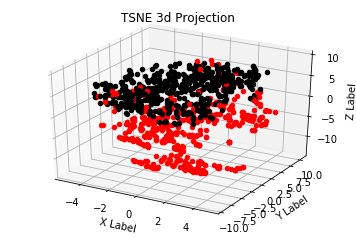

In [30]:
ax = plt.subplot(projection='3d')

for index in range(len(vis_balanced_x_3d)):
    
    if balanced_evaluator[index] == 0:
        
        ax.scatter(vis_balanced_x_3d[index], vis_balanced_y_3d[index], vis_balanced_z_3d[index], color = 'black')
    
    else:
        
        ax.scatter(vis_balanced_x_3d[index], vis_balanced_y_3d[index], vis_balanced_z_3d[index], color = 'red')

ax.set_title('TSNE 3d Projection')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

<h1>Balanced dataset with PCA & TSNE</h1>

<h2>2d Visualization with PCA & TSNE</h2>

In [31]:
pca = PCA(n_components=2)

<h3>2d PCA</h3>

In [32]:
balanced_dataset_pca_2d = pca.fit_transform(balanced_dataset)

<h3>2d TSNE</h3>

In [33]:
start_train = datetime.datetime.now().replace(microsecond=0)
X_embedded_2d = TSNE(n_components=2,verbose=1,perplexity=80).fit_transform(balanced_dataset_pca_2d)
end_train = datetime.datetime.now().replace(microsecond=0)
print('\n\n2d PCA & TSNE Balanced Train Time: ',end_train-start_train)

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 984 samples in 0.001s...
[t-SNE] Computed neighbors for 984 samples in 0.046s...
[t-SNE] Computed conditional probabilities for sample 984 / 984
[t-SNE] Mean sigma: 0.090607
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.534706
[t-SNE] KL divergence after 1000 iterations: 0.179647


2d PCA & TSNE Balanced Train Time:  0:00:07


<h3>X Y axis</h3>

In [34]:
vis_balanced_x_2d = X_embedded_2d[:,0]
vis_balanced_y_2d = X_embedded_2d[:,1]

<h3>Scatter Plot</h3>

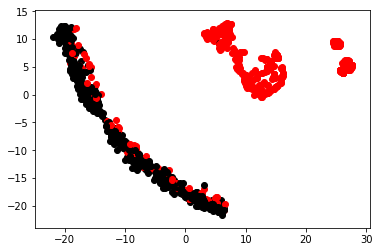

In [35]:
for index in range(len(vis_balanced_x_2d)):
    
    if balanced_evaluator[index] == 0:
        
        plt.scatter(vis_balanced_x_2d[index], vis_balanced_y_2d[index], color = 'black')
    
    else:
        
        plt.scatter(vis_balanced_x_2d[index], vis_balanced_y_2d[index], color = 'red')

plt.show()

<h2>3d Visualization with PCA & TSNE</h2>

In [36]:
pca = PCA(n_components=3)

<h3>3d PCA</h3>

In [37]:
balanced_dataset_pca_3d = pca.fit_transform(balanced_dataset)

<h3>3d TSNE</h3>

In [38]:
start_train = datetime.datetime.now().replace(microsecond=0)
X_embedded_3d = TSNE(n_components=3,verbose=1,perplexity=80).fit_transform(balanced_dataset_pca_2d)
end_train = datetime.datetime.now().replace(microsecond=0)
print('\n\n3d PCA & TSNE Balanced Train Time: ',end_train-start_train)

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 984 samples in 0.001s...
[t-SNE] Computed neighbors for 984 samples in 0.048s...
[t-SNE] Computed conditional probabilities for sample 984 / 984
[t-SNE] Mean sigma: 0.090607
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.572277
[t-SNE] KL divergence after 1000 iterations: 0.118832


3d PCA & TSNE Balanced Train Time:  0:00:38


<h3>X Y Z axis</h3>

In [39]:
vis_balanced_x_3d = X_embedded_3d[:,0]
vis_balanced_y_3d = X_embedded_3d[:,1]
vis_balanced_z_3d = X_embedded_3d[:,2]

<h3>Scatter Plot</h3>

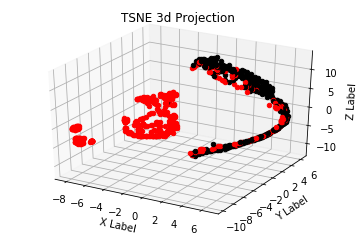

In [40]:
ax = plt.subplot(projection='3d')

for index in range(len(vis_balanced_x_3d)):
    
    if balanced_evaluator[index] == 0:
        
        ax.scatter(vis_balanced_x_3d[index], vis_balanced_y_3d[index], vis_balanced_z_3d[index], color = 'black')
    
    else:
        
        ax.scatter(vis_balanced_x_3d[index], vis_balanced_y_3d[index], vis_balanced_z_3d[index], color = 'red')

ax.set_title('TSNE 3d Projection')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

<h1>Unsupervised Machine Learning Approach</h1>

<h3>Dependencies</h3>

In [41]:
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, FeatureAgglomeration
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

<h3>Create Train, Test, Validation Datasets</h3>

In [42]:
ones = df[df.Class == 1]

In [43]:
zeroes = df[df.Class == 0]

In [44]:
ones = shuffle(ones,random_state=2)

In [45]:
zeroes = shuffle(zeroes,random_state=2)

<h3>Train Test Validation with 0.6, 0.2, 0.2 ratio</h3>

In [46]:
x_train_ones = ones[200:]
x_test_ones = ones[:100]
x_val_ones = ones[100:200]

In [47]:
x_train = pd.concat([x_train_ones,zeroes.sample(n=len(x_train_ones),random_state=1234)],axis=0)
x_train = shuffle(x_train,random_state=2)
x_train = x_train.reset_index()
print(len(x_train_ones),len(x_train))

292 584


In [48]:
x_test = pd.concat([x_test_ones,zeroes.sample(n=len(x_test_ones),random_state=1234)],axis=0)
x_test = shuffle(x_test,random_state=2)
x_test = x_test.reset_index()

In [49]:
x_val = pd.concat([x_val_ones,zeroes.sample(n=len(x_val_ones),random_state=1234)],axis=0)
x_val = shuffle(x_val,random_state=2)
x_val = x_val.reset_index()

<h3>The Classes for the Train Test Validation</h3>

In [50]:
y_train = x_train['Class']
y_test = x_test['Class']
y_val = x_val['Class']

<h3>The Train Data without the 'Class' Column</h3>

In [51]:
scaler = MinMaxScaler()

In [52]:
x_train = x_train.drop(columns=['Class'])
x_train = scaler.fit_transform(x_train)

x_test = x_test.drop(columns=['Class'])
x_test = scaler.fit_transform(x_test)

x_val = x_val.drop(columns=['Class'])
x_val = scaler.fit_transform(x_val)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


<h1>K-Means Clustering</h1>

In [53]:
kmeans = KMeans(n_clusters=2,verbose=1,n_jobs=-1,random_state=1234)

In [54]:
kmeans.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=1)

<h3>Train Confusion Matrix</h3>

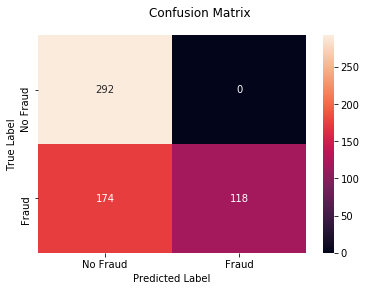

In [55]:
ax = sns.heatmap(confusion_matrix(y_train,kmeans.predict(x_train)),annot=True,fmt="d",xticklabels=["No Fraud","Fraud"],yticklabels=["No Fraud","Fraud"])

ax.figure.suptitle('Confusion Matrix')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<h3>Train Accuracy</h3>

In [56]:
print('Train Accuracy: ',accuracy_score(y_train,kmeans.predict(x_train)))

Train Accuracy:  0.702054794520548


In [57]:
x_predicted = kmeans.predict(x_test)

<h3>Test Confusion Matrix</h3>

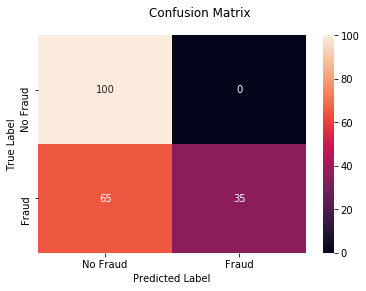

In [58]:
ax = sns.heatmap(confusion_matrix(y_test,x_predicted),annot=True,fmt="d",xticklabels=["No Fraud","Fraud"],yticklabels=["No Fraud","Fraud"])

ax.figure.suptitle('Confusion Matrix')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<h3>Test Accuracy</h3>

In [59]:
print('Test Accuracy: ',accuracy_score(y_test,kmeans.predict(x_test)))

Test Accuracy:  0.675


In [60]:
val_predicted = kmeans.predict(x_val)

<h3>Validation Confusion Matrix</h3>

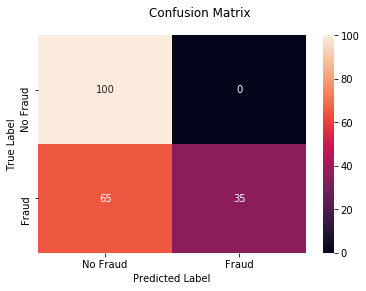

In [61]:
ax = sns.heatmap(confusion_matrix(y_val,val_predicted),annot=True,fmt="d",xticklabels=["No Fraud","Fraud"],yticklabels=["No Fraud","Fraud"])

ax.figure.suptitle('Confusion Matrix')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<h3>Validation Accuracy</h3>

In [62]:
print('Validation Accuracy: ',accuracy_score(y_val,kmeans.predict(x_val)))

Validation Accuracy:  0.675


<h1>A Deep Learning Approach</h1>

<h3>AutoEncoder Architecture Keras Implementation</h3>

<h3>Dependencies</h3>

In [63]:
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dropout, Dense, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.losses import mean_squared_error
from keras import backend as K

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [64]:
SEED = 1234

tf.set_random_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1, 
    inter_op_parallelism_threads=1
)
sess = tf.Session(
    graph=tf.get_default_graph(), 
    config=session_conf
)
K.set_session(sess)

<h3>AutoEncoder Model with 1 unit in the middle layer</h3>

In [65]:
model = Sequential()
model.add(Dense(input_dim=31,units=6,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid',name='cluster_layer'))
model.add(BatchNormalization())
model.add(Dense(3,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(6,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(31, activation='relu'))

<h3>Create a Model in order to access only the middle layer</h3>

In [66]:
layer_name = 'cluster_layer'
cluster_layer = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)

<h3>Use the Optimizer and Compile the Model</h3>

In [67]:
adam = Adam(lr=0.005)
model.compile(loss=mean_squared_error, optimizer=adam)

<h3>Print a summary of the Model</h3>

In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 192       
_________________________________________________________________
batch_normalization_1 (Batch (None, 6)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 21        
_________________________________________________________________
batch_normalization_2 (Batch (None, 3)                 12        
_________________________________________________________________
cluster_layer (Dense)        (None, 1)                 4         
_________________________________________________________________
batch_normalization_3 (Batch (None, 1)                 4         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 6         
__________

<h3>Train the Model</h3>

In [69]:
history = model.fit(x_train, x_train,
          epochs=3,
          verbose=1,
          validation_data=(x_test, x_test))

Train on 584 samples, validate on 200 samples
Epoch 1/3
584/584 [==============================] - 2s 3ms/step - loss: 0.2434 - val_loss: 0.2424
Epoch 2/3
584/584 [==============================] - 0s 107us/step - loss: 0.2006 - val_loss: 0.2240
Epoch 3/3
584/584 [==============================] - 0s 127us/step - loss: 0.1828 - val_loss: 0.1990


<h3>Plots</h3>

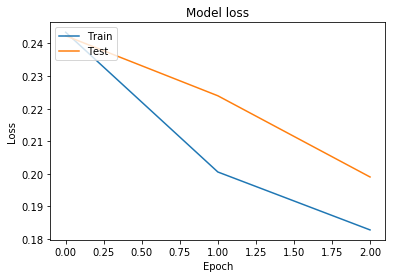

In [70]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<h1>Evaluate the train data</h1>

In [71]:
output_train = cluster_layer.predict(x_train)

In [72]:
output_train = (output_train > 0.5).astype(int)

<h3>Train data Confusion Matrix</h3>

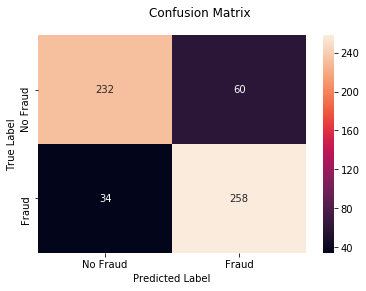

In [73]:
ax = sns.heatmap(confusion_matrix(y_train,output_train),annot=True,fmt="d",xticklabels=["No Fraud","Fraud"],yticklabels=["No Fraud","Fraud"])

ax.figure.suptitle('Confusion Matrix')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<h3>Train data Accuracy</h3>

In [74]:
print('Train Accuracy: ',accuracy_score(y_train,output_train))

Train Accuracy:  0.839041095890411


<h1>Evaluate the Test data</h1>

In [75]:
output_test = cluster_layer.predict(x_test)

In [76]:
output_test = (output_test > 0.5).astype(int)

<h3>Test data Confusion Matrix</h3>

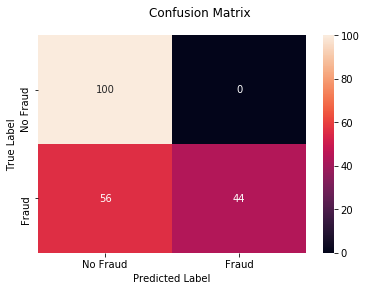

In [77]:
ax = sns.heatmap(confusion_matrix(y_test,output_test),annot=True,fmt="d",xticklabels=["No Fraud","Fraud"],yticklabels=["No Fraud","Fraud"])

ax.figure.suptitle('Confusion Matrix')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<h3>Test data Accuracy</h3>

In [78]:
print('Test Accuracy: ',accuracy_score(y_test,output_test))

Test Accuracy:  0.72


<h1>Evaluate the Validation data</h1>

In [79]:
output_val = cluster_layer.predict(x_val)

In [80]:
output_val = (output_val > 0.5).astype(int)

<h3>Validation data Confusion Matrix</h3>

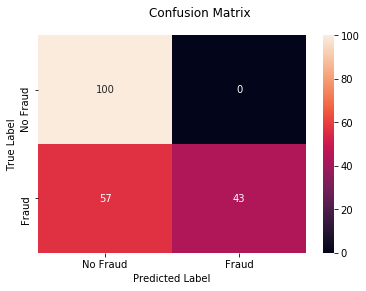

In [81]:
ax = sns.heatmap(confusion_matrix(y_val,output_val),annot=True,fmt="d",xticklabels=["No Fraud","Fraud"],yticklabels=["No Fraud","Fraud"])

ax.figure.suptitle('Confusion Matrix')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<h3>Validation data Accuracy</h3>

In [82]:
print('Validation Accuracy: ',accuracy_score(y_val,output_val))

Validation Accuracy:  0.715
